# Demonstrating the Wolfson Bipolarization Coefficient:

The Wolfson Polarization Index, introduced by Wolfson (1994), is a measure used to quantify the degree of bipolarization within a distribution, particularly income distributions. Unlike traditional inequality measures, such as the Gini coefficient, which capture the overall level of inequality within a distribution, the Wolfson index specifically focuses on the extent to which a distribution exhibits characteristics of bipolarization. This means it is sensitive to the presence of two distinct groups or "poles" in the distribution, which can signal social or economic divisions.

Bipolarization occurs when the population tends to cluster around two income poles, resulting in a “hollowing out” of the middle class. This phenomenon has been observed in many advanced economies where growing income inequality is not just due to the rich getting richer and the poor getting poorer, but also due to the diminishing size of the middle-income group.

The Wolfson index is defined mathematically in terms of the Lorenz curve, but it differs from traditional Lorenz-based indices (like the Gini coefficient) by its focus on the distance between the poles of a distribution. The index increases as the distribution becomes more polarized, which happens when the middle of the distribution thins out while the lower and upper ends of the distribution expand.

Wolfson’s work (1994) has been foundational in the field of inequality measurement, offering new insights into the nature of economic divisions beyond what is captured by measures like variance or Gini. By applying the Wolfson index to different income distributions, analysts can better understand the dynamics of income segmentation and social stratification within a population.


Wolfson, M. C. (1994). When Inequalities Diverge. The American Economic Review, 84(2), 353-358.

-------------------------

### 1. Imports & Input Data

In [54]:
from inequality.wolfson import wolfson

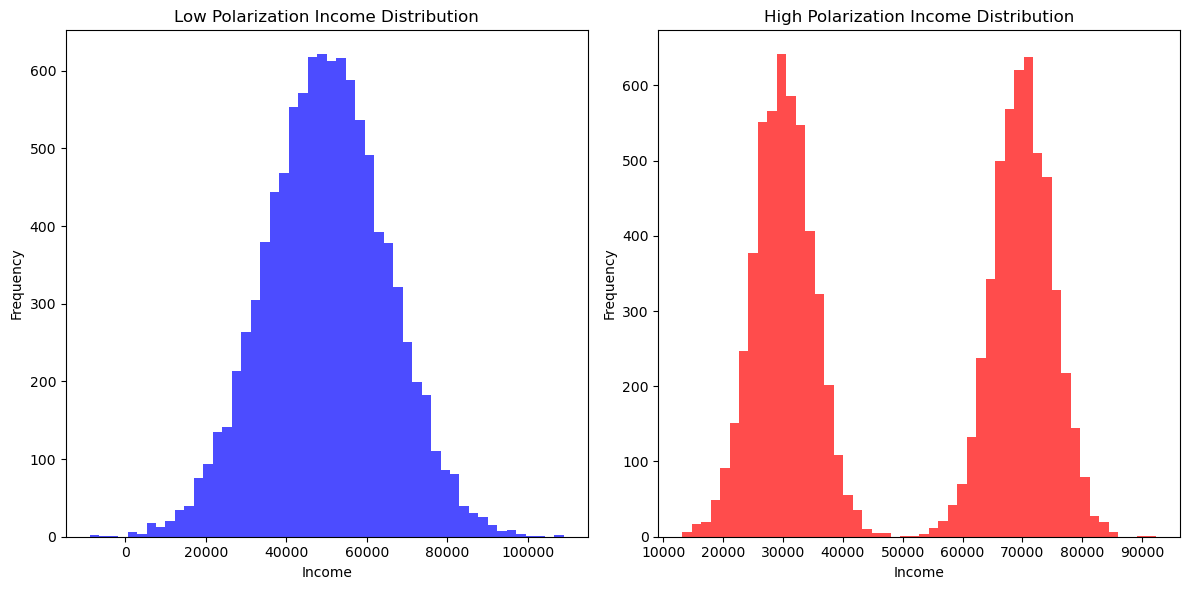

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Distribution 1: Low polarization (normal distribution)
income_low_polarization = np.random.normal(loc=50000, scale=15000, size=10000)

# Distribution 2: High polarization (bimodal distribution)
income_high_polarization = np.concatenate(
    [
        np.random.normal(loc=30000, scale=5000, size=5000),
        np.random.normal(loc=70000, scale=5000, size=5000),
    ]
)

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Plot for low polarization
plt.subplot(1, 2, 1)
plt.hist(income_low_polarization, bins=50, color="blue", alpha=0.7)
plt.title("Low Polarization Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")

# Plot for high polarization
plt.subplot(1, 2, 2)
plt.hist(income_high_polarization, bins=50, color="red", alpha=0.7)
plt.title("High Polarization Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")

# Show plots
plt.tight_layout()
plt.show()

In [56]:
wolfson(income_high_polarization)

np.float64(0.17571224182763848)

In [57]:
wolfson(income_low_polarization)

np.float64(0.07016937981819878)

## Analyzing Bipolarization in Mexico's Regional GDP
To illustrate the Wolfson Bipolarization Coefficient in a spatial economic context, we apply it to regional per capita GDP (PCGDP) data for Mexico. The dataset contains economic data for different Mexican states, spanning the decades of 1940-2000.

Economic polarization is an important issue in Mexico, where regional disparities have persisted due to differences in industrialization, trade policies, and historical investment patterns. The Wolfson index allows us to measure whether income differences across regions have become more extreme over time—indicating a divergence between wealthier and poorer states.

In the following analysis, we compute the Wolfson index for PCGDP in 1960 and 2000, visualizing income distributions and mapping economic disparities.
Note that all values are in constant 2000USD.

Income Distribution in 1960 vs. 2000
First, we visualize the distribution of per capita GDP across Mexican states:




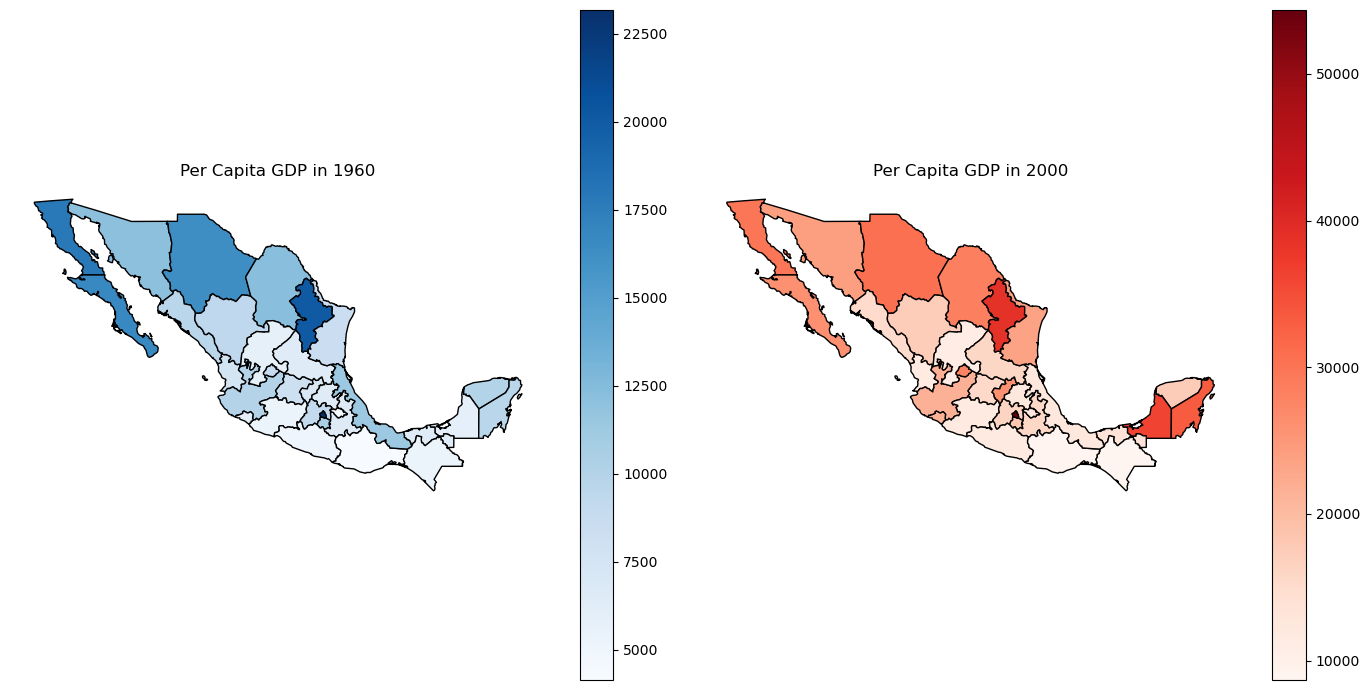

In [46]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Choropleth map for 1960
gdf.plot(column="PCGDP1960", cmap="Blues", legend=True, ax=axes[0], edgecolor="black")
axes[0].set_title("Per Capita GDP in 1960")
axes[0].axis("off")

# Choropleth map for 2000
gdf.plot(column="PCGDP2000", cmap="Reds", legend=True, ax=axes[1], edgecolor="black")
axes[1].set_title("Per Capita GDP in 2000")
axes[1].axis("off")

plt.tight_layout()
plt.show()

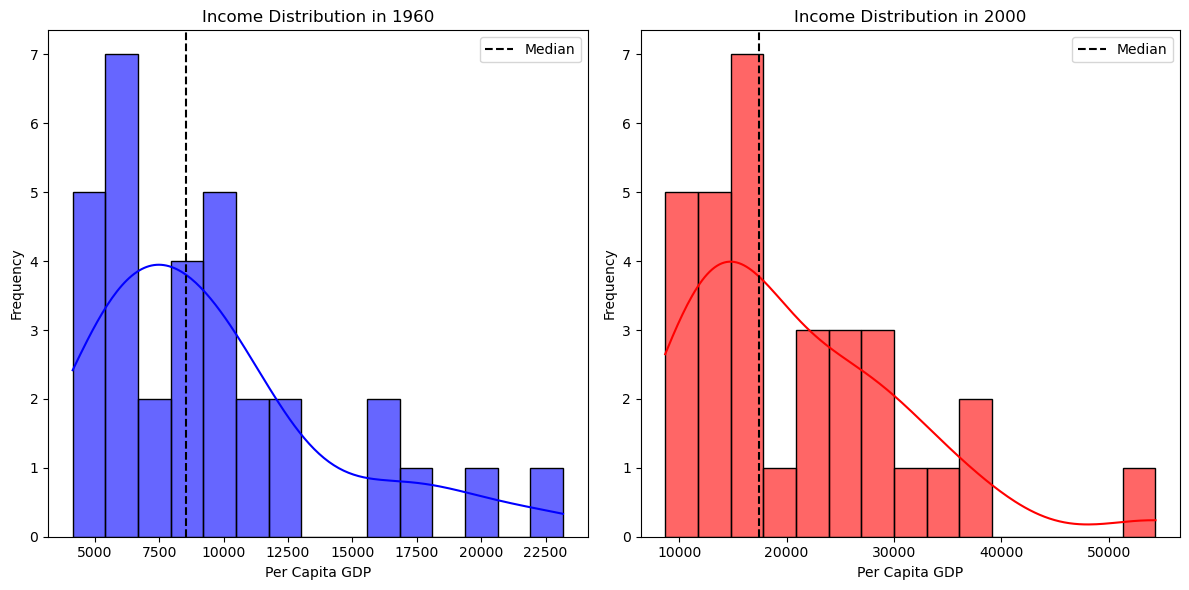

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

gdf = gdf.dropna(subset=["PCGDP1960", "PCGDP2000"])

plt.figure(figsize=(12, 6))

# Histogram & KDE for 1960
plt.subplot(1, 2, 1)
sns.histplot(gdf["PCGDP1960"], bins=15, color="blue", alpha=0.6, kde=True)
plt.axvline(
    gdf["PCGDP1960"].median(), color="black", linestyle="dashed", label="Median"
)
plt.title("Income Distribution in 1960")
plt.xlabel("Per Capita GDP")
plt.ylabel("Frequency")
plt.legend()

# Histogram & KDE for 2000
plt.subplot(1, 2, 2)
sns.histplot(gdf["PCGDP2000"], bins=15, color="red", alpha=0.6, kde=True)
plt.axvline(
    gdf["PCGDP2000"].median(), color="black", linestyle="dashed", label="Median"
)
plt.title("Income Distribution in 2000")
plt.xlabel("Per Capita GDP")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

We can emphasize the changes in the distribution by using the same range for the two densities:

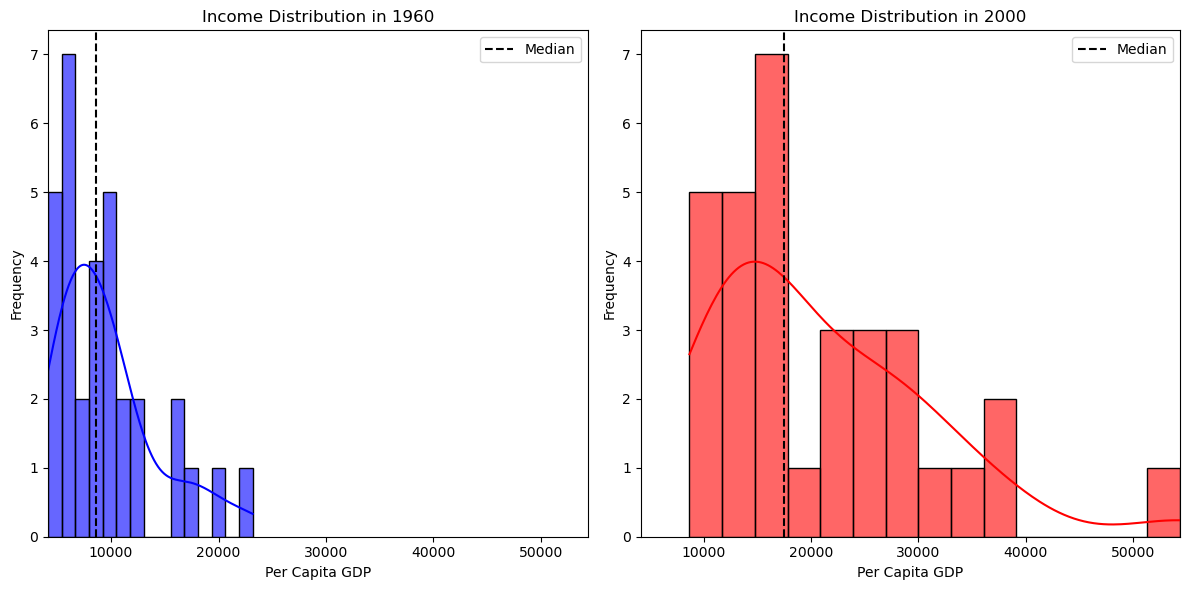

In [51]:
plt.figure(figsize=(12, 6))

min_value = min(gdf["PCGDP1960"].min(), gdf["PCGDP2000"].min())
max_value = max(gdf["PCGDP1960"].max(), gdf["PCGDP2000"].max())


# Histogram & KDE for 1960
plt.subplot(1, 2, 1)
sns.histplot(gdf["PCGDP1960"], bins=15, color="blue", alpha=0.6, kde=True)
plt.axvline(
    gdf["PCGDP1960"].median(), color="black", linestyle="dashed", label="Median"
)
plt.title("Income Distribution in 1960")
plt.xlabel("Per Capita GDP")
plt.xlim(min_value, max_value)
plt.ylabel("Frequency")
plt.legend()

# Histogram & KDE for 2000
plt.subplot(1, 2, 2)
sns.histplot(gdf["PCGDP2000"], bins=15, color="red", alpha=0.6, kde=True)
plt.axvline(
    gdf["PCGDP2000"].median(), color="black", linestyle="dashed", label="Median"
)
plt.title("Income Distribution in 2000")
plt.xlabel("Per Capita GDP")
plt.xlim(min_value, max_value)

plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

From these plots, we observe that:

- In 1960, the distribution appears more concentrated, suggesting that regional economies were more similar.
- By 2000, the spread has widened, with more states falling into high-income and low-income categories, possibly reflecting greater economic divergence

We quantify this polarization using the Wolfson index:

In [52]:
w_1960 = wolfson(gdf["PCGDP1960"])
w_2000 = wolfson(gdf["PCGDP2000"])

print(f"Wolfson Index (1960): {w_1960:.4f}")
print(f"Wolfson Index (2000): {w_2000:.4f}")

Wolfson Index (1960): 0.1107
Wolfson Index (2000): 0.1362


A higher Wolfson index in 2000 compared to 1960 confirms that income polarization has increased.
This suggests that economic growth has not been uniform—some regions have advanced while others have stagnated, exacerbating regional inequalities.


To track the evolution of economic bipolarization over time, we compute the Wolfson index for each decade from 1940 to 2010.

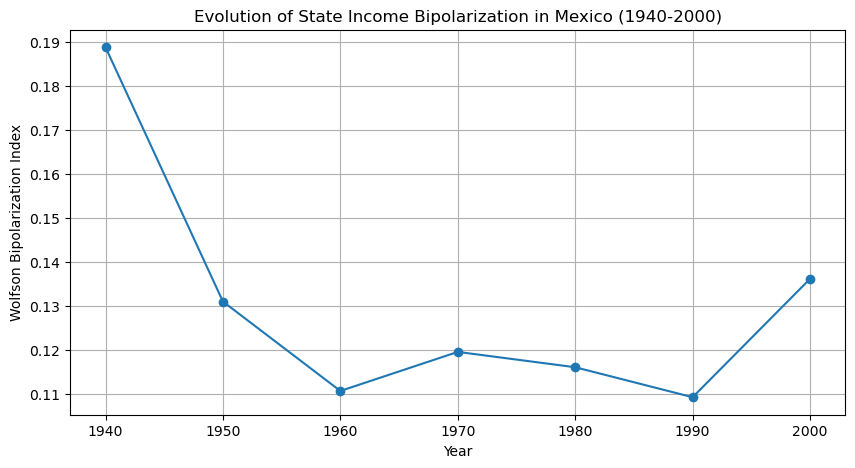

In [58]:
years = range(1940, 2010, 10)
w_values = [wolfson(gdf[f"PCGDP{year}"]) for year in years]

import pandas as pd

ts = pd.DataFrame({"Year": years, "Wolfson Index": w_values}).set_index("Year")

plt.figure(figsize=(10, 5))
plt.plot(ts.index, ts["Wolfson Index"], marker="o", linestyle="-")
plt.title("Evolution of State Income Bipolarization in Mexico (1940-2000)")
plt.xlabel("Year")
plt.ylabel("Wolfson Bipolarization Index")
plt.grid(True)
plt.show()

Thus, while bipolarization in 2000 exceeded that in 1960, the level of polarization was lower relative to the values at the beginning of the period.